<a href="https://colab.research.google.com/github/noy2121/CIFAR10-Image-Classification-using-ResNet/blob/main/Cifar10Classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

FOLDERNAME = 'DL_Projects/Cifar10Classifier/'

assert FOLDERNAME is not None, "[!] Enter the foldername."

%cd drive/My\ Drive
%cp -r $FOLDERNAME ../../
%cd ../../

Mounted at /content/drive
/content/drive/My Drive
/content


In [ ]:
# Run some setup code for this notebook

import random
import numpy as np
import keras
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Load the raw CIFAR-10 data
# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_trn, y_trn
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

(X_trn, y_trn), (X_test, y_test) = keras.datasets.cifar10.load_data()

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_trn.shape)
print('Training labels shape: ', y_trn.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


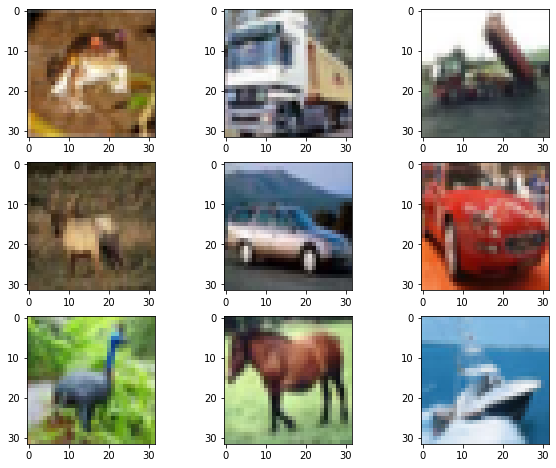

In [ ]:
# Visualize some examples from the dataset
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_trn[i])
# show the figure
plt.show()

In [ ]:
# Data Preprocessing
# Create training and val sets
(X_train, y_train) = X_trn[:40000, ...], y_trn[:40000, ...]
y_train = y_train.ravel()
(X_val, y_val) = X_trn[40000:50000, ...], y_trn[40000:50000, ...]
y_val = y_val.ravel()

In [ ]:
# Import the libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

# one-hot encode
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
# Data augmentation
train_datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,
                          shear_range=0.15, zoom_range=0.15, horizontal_flip=True)
train_datagen.fit(X_train)
print('Training data shape: ', X_train.shape)
print('Training labels shape : ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation data labels: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (40000, 32, 32, 3)
Training labels shape :  (40000, 10)
Validation data shape:  (10000, 32, 32, 3)
Validation data labels:  (10000, 10)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


In [ ]:
import sys
sys.path.append('/content/Cifar10Classifier/')

In [ ]:
# Create model architecture, and compile it
from ResNetModel import ResNet
model = ResNet.build(32, 32, 3, 10, [3, 6], [32, 64, 128])
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Begin training
hist = model.fit(train_datagen.flow(X_train, y_train, batch_size=32),
                 validation_data=(X_val, y_val), epochs = 100, shuffle=True)

Epoch 1/100
1250/1250 [==============================] - 31s 25ms/step - loss: 1.6888 - accuracy: 0.4260 - val_loss: 1.4148 - val_accuracy: 0.5378
Epoch 2/100
1250/1250 [==============================] - 31s 25ms/step - loss: 1.3439 - accuracy: 0.5640 - val_loss: 1.2438 - val_accuracy: 0.6089
Epoch 3/100
1250/1250 [==============================] - 31s 24ms/step - loss: 1.1743 - accuracy: 0.6273 - val_loss: 1.0460 - val_accuracy: 0.6779
Epoch 4/100
1250/1250 [==============================] - 30s 24ms/step - loss: 1.0654 - accuracy: 0.6695 - val_loss: 1.0223 - val_accuracy: 0.6903
Epoch 5/100
1250/1250 [==============================] - 30s 24ms/step - loss: 0.9918 - accuracy: 0.6975 - val_loss: 1.0224 - val_accuracy: 0.6914
Epoch 6/100
1250/1250 [==============================] - 30s 24ms/step - loss: 0.9453 - accuracy: 0.7149 - val_loss: 0.8964 - val_accuracy: 0.7397
Epoch 7/100
1250/1250 [==============================] - 30s 24ms/step - loss: 0.8980 - accuracy: 0.7316 - val_loss: 0

In [ ]:
# Save model
model.save('/content/Cifar10Classifier/best_model.h5')
print('Model saved!')
# Evaluate the model
scores = model.evaluate(X_val, y_val, verbose=1)
print('Validation loss:', scores[0])
print('Validation accuracy:', scores[1])


Model saved!
313/313 [==============================] - 1s 5ms/step - loss: 0.5803 - accuracy: 0.8571
Validation loss: 0.5802562832832336
Validation accuracy: 0.8571000099182129


In [ ]:
from sklearn.metrics import classification_report
# Print scores
y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred, axis=1)
y_val = np.argmax(y_val, axis=1)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1014
           1       0.92      0.95      0.93      1014
           2       0.86      0.80      0.83       952
           3       0.81      0.64      0.71      1016
           4       0.88      0.82      0.85       997
           5       0.83      0.78      0.80      1025
           6       0.76      0.95      0.84       980
           7       0.86      0.91      0.88       977
           8       0.93      0.93      0.93      1003
           9       0.86      0.94      0.90      1022

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



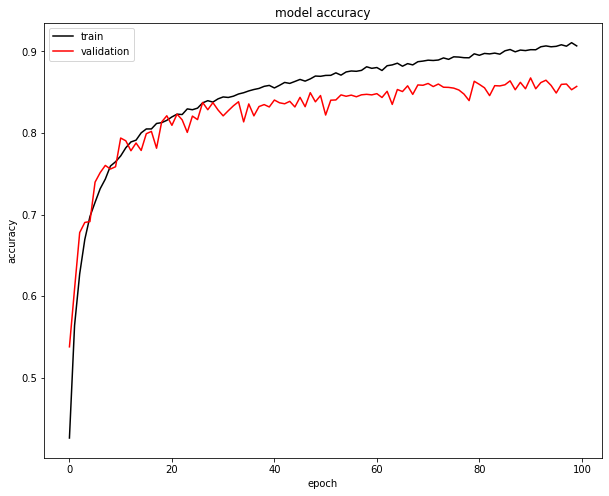

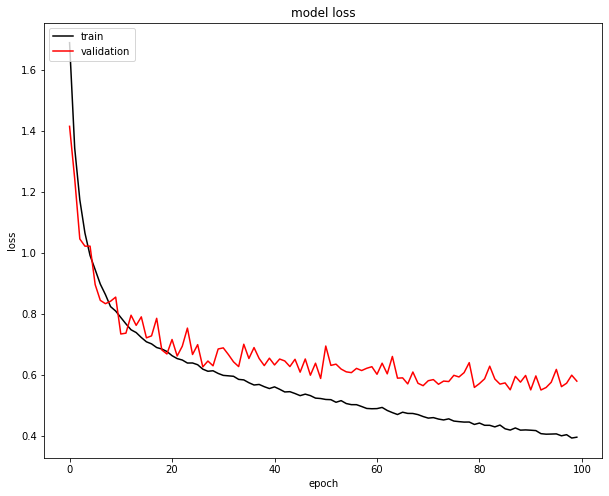

In [ ]:
# Plot of model accuracy on train and validation datasets
plt.plot(hist.history['accuracy'], color='black')
plt.plot(hist.history['val_accuracy'], color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot of model loss on train and validation datasets
plt.plot(hist.history['loss'], color='black')
plt.plot(hist.history['val_loss'], color='red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_true = np.zeros((10000, 1))
print(y_true.shape)
print(y_test.shape)
    

(10000, 1)
(10000, 10)


In [ ]:
# CIFAR10 labels
cifar10_labels = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer',
                           'dog', 'frog', 'horse', 'ship', 'truck'])

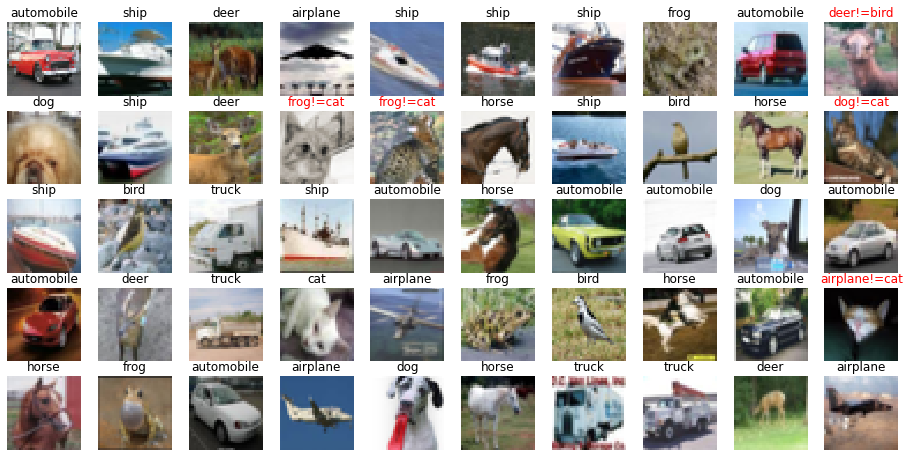

Number of correct answers: 45
Number of wrong answers: 5
Correct answer rate: 90.0 %


In [ ]:
# Load model and predict X_test

# model = keras.models.load_model('/content/Cifar10Classifier/best_model.h5')
# print('Model loaded!')
def convertData(image):
    img = image.astype('float32')
    img_arr = np.zeros(32*32*3).reshape((1,32,32,3))
    img_arr[0] = img
    return img_arr

plt.figure(figsize=(16,16))
right = 0
mistake = 0

for i in range(50):
    index = random.randint(0, X_test.shape[0])
    image = X_test[index]
    data = convertData(image)
    plt.subplot(10, 10, i+1)
    plt.imshow(image)
    plt.axis('off')

    # Predict the data
    prediction = model.predict(data, batch_size=1) 
    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < prediction[0][n]:
            bestnum = prediction[0][n]
            bestclass = n

    if y_test[index] == bestclass:
      plt.title(cifar10_labels[bestclass])
      right += 1
    else:
      plt.title(cifar10_labels[bestclass] + '!=' + cifar10_labels[int(y_test[index][0])], color='red')
      mistake += 1
                                                                   
plt.show()
print("Number of correct answers:", right)
print("Number of wrong answers:", mistake)
print("Correct answer rate:", right/(mistake + right)*100, '%')
